#### I just want to create a project for basic linear regression.
##### in this project i will use data from : https://www.kaggle.com/datasets/smritisingh1997/car-salescsv/code
#### i will use two youtube videos for linear regression.
##### https://www.youtube.com/watch?v=GhrxgbQnEEU
##### https://www.youtube.com/watch?v=2SCg8Kuh0tE


#### I will use these fucntion of numpy in this project:



#### I want to find relationships between:
#### 1: brands and prices
#### 2: brands and milages
#### 3: brands and Year

### to find nan location

import pandas as pd

df = pd.DataFrame({'a':[1, 2, np.nan, 4, 5]})

# Find the rows where there are NaN values
rows = df.loc[is_nan]

print(rows)

--------------

import pandas as pd

df = pd.DataFrame({'a':[1, 2, np.nan, 4, 5]})

# Find the NaN values
is_nan = df.isnull()

# Find the indices of the NaN values
indices = is_nan.index()

print(indices)


### to remove nan value


#### Syntax of Series.dropna() function
Series.dropna(axis=0, inplace=False, how=None)

# Frist preper data arraies

In [60]:
# import required libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [158]:
# read data

data = pd.read_csv("CAR_SALE_DATA.csv")
df = pd.DataFrame(data).dropna()
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [159]:
df[df.isnull().any(axis=1)] 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model


In [160]:
df.Price[df.isnull().any(axis=1)] .head()

Series([], Name: Price, dtype: float64)

In [161]:
df.dropna().head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [163]:
df.loc[[17]]

KeyError: "None of [Int64Index([17], dtype='int64')] are in the [index]"

In [164]:
# insert all values of "Brand" column to ndarry 
brand = df["Brand"].to_numpy()

# clear repetitive values of brand ndarry
brand = np.unique(brand)

brand

array(['Audi', 'BMW', 'Mercedes-Benz', 'Mitsubishi', 'Renault', 'Toyota',
       'Volkswagen'], dtype=object)

### for each brand, i will calculate average of values.

#### https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values

In [165]:
df.loc[df["Brand"] == "BMW"].head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
16,BMW,2990.0,other,203,2.0,Petrol,no,2001,318
31,BMW,21500.0,other,72,3.0,Petrol,yes,2007,Z4
33,BMW,28500.0,crossover,160,4.8,Gas,yes,2008,X5


In [166]:
# find value in column

df.loc[df.Brand == "BMW"][df.Price == 4200.0]

C:\Users\Saeed\AppData\Local\Temp\ipykernel_8456\3763866272.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[df.Brand == "BMW"][df.Price == 4200.0]


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320


### how to use groupby
#### https://www.youtube.com/watch?v=qy0fDqoMJx8

### how to use apply()
#### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html


In [167]:
price_mean = df.groupby("Brand").Price.mean().to_numpy()
price_mean

array([18906.5952381 , 23648.18164062, 30825.80315917, 11403.35602606,
        8066.67397753, 22772.76315686, 13122.94122727])

In [168]:
mileage_mean = df.groupby("Brand").Mileage.mean().to_numpy()
mileage_mean

array([180.68571429, 173.478125  , 182.82989064, 141.58957655,
       156.6741573 , 117.67647059, 167.94545455])

In [169]:
year_mean = df.groupby("Brand").Year.mean().round().to_numpy()
year_mean

array([2005., 2005., 2006., 2006., 2008., 2008., 2007.])

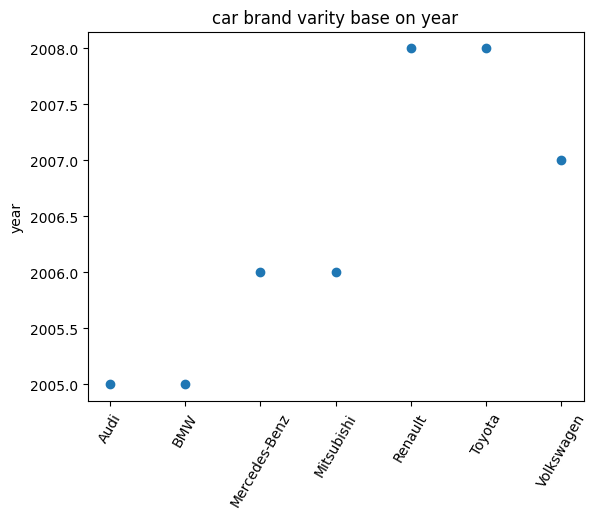

In [170]:
fig, ax = plt.subplots()

ax.scatter(brand, year_mean)

ax.set_ylabel('year')
ax.set_title('car brand varity base on year')
plt.xticks(rotation = 60)

plt.show()


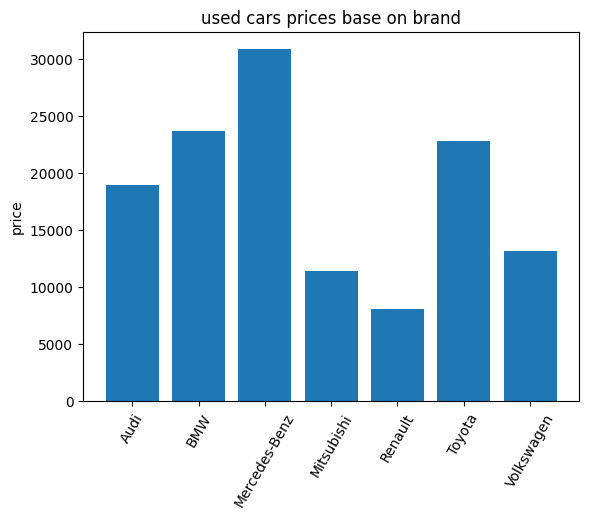

In [171]:
fig, ax = plt.subplots()

ax.bar(brand, price_mean)

ax.set_ylabel('price')
ax.set_title('used cars prices base on brand')
plt.xticks(rotation = 60)

plt.show()

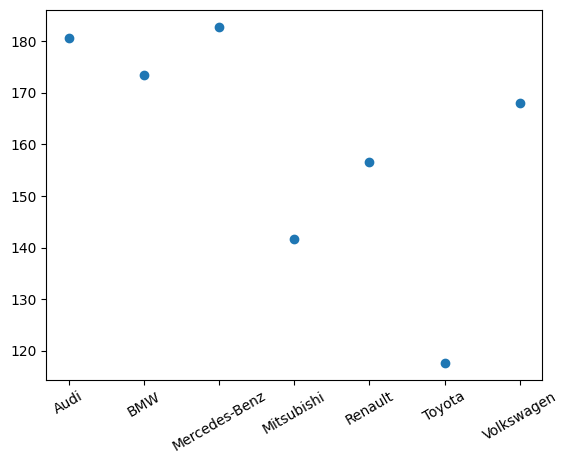

In [172]:
fig , ax = plt.subplots()

ax.scatter(brand, mileage_mean)

plt.xticks(rotation=30)

plt.show()

#### Know we will use numpy to fit a linear regretion on our arries
###### https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html i will use this numpy method

In [173]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [174]:
# now i will make a linear regretion BMW - prices - mileage


bmw_df = df.loc[df.Brand == 'BMW']
bmw_df.head()




,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
16,BMW,2990.0,other,203,2.0,Petrol,no,2001,318
31,BMW,21500.0,other,72,3.0,Petrol,yes,2007,Z4
33,BMW,28500.0,crossover,160,4.8,Gas,yes,2008,X5


In [175]:
# create a price array and drop any nan value 
bmw_price_array = df['Price'].to_numpy()

bmw_mileage_array = df['Mileage'].to_numpy()

In [176]:
# to see there is nan in your data fram
bmw_price_array.isnull().values

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

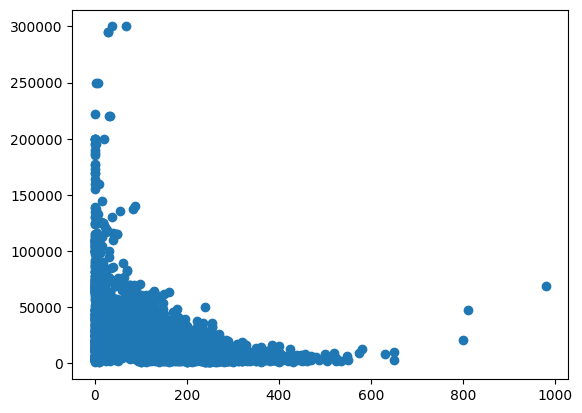

In [177]:
fig, ax = plt.subplots()

ax.scatter(bmw_mileage_array, bmw_price_array)


plt.show()

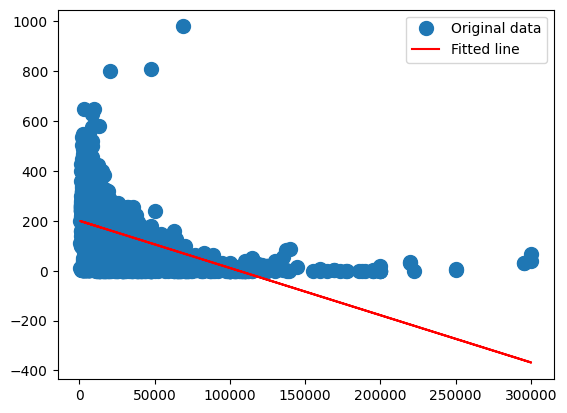

In [178]:
A = np.vstack([bmw_price_array, np.ones(len(bmw_price_array))]).T
m, c = np.linalg.lstsq(A, bmw_mileage_array, rcond=None)[0]

plt.plot(bmw_price_array, bmw_mileage_array, 'o', label='Original data', markersize=10)
plt.plot(bmw_price_array, m*bmw_price_array + c, 'r', label='Fitted line')
plt.legend()
plt.show()

In [179]:
#len(bmw_mileage_array)
"NaN" in bmw_price_array

C:\Users\Saeed\AppData\Local\Temp\ipykernel_8456\2184270019.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  "NaN" in bmw_price_array


False

In [180]:
len(bmw_price_array)

4025